## **Section by Selmah  – Data Mining process:Part 1**

##  K-Means Clustering: Theory & Working Principle

###  What is K-Means?
K-Means is an **unsupervised machine learning algorithm** used to group data into **K clusters** based on feature similarity.  
It minimizes the **variance within clusters** and maximizes the variance between clusters.

---

###  **How It Works (Step-by-Step)**
1. **Choose K**: Decide how many clusters you want to create (e.g., K=3).
2. **Initialize Centroids**: Randomly place K points (centroids) in the data space.
3. **Assign Points**: Each data point is assigned to the **nearest centroid** (using distance, usually Euclidean).
4. **Update Centroids**: Calculate the **mean position** of points in each cluster and move the centroid there.
5. **Repeat Steps 3-4**: Continue until centroids stop changing significantly (algorithm converges).

---

###  **Mathematics Behind It**
The algorithm minimizes the **Within-Cluster Sum of Squares (WCSS):**
\[
J = \sum_{k=1}^{K} \sum_{i \in C_k} ||x_i - \mu_k||^2
\]
Where:  
- \( C_k \) = cluster k  
- \( x_i \) = data point  
- \( \mu_k \) = centroid of cluster k

---

###  Why Use K-Means?
-  Simple and fast
-  Works well for large datasets
-  Great for segmentation (customers, products, etc.)

---

###  **Limitations**
-  Must predefine K
-  Sensitive to outliers
-  Works best with spherical (non-overlapping) clusters

---

###  **Application to Our Project**
We want to identify **customer segments** or **order patterns** based on numerical attributes such as:
- `payment_value` (how much was paid per order)
- `price` (product prices)
- `profit_margin` (profitability per order)
- `purchase_frequency` (how often customers purchase)
- `product_weight_g` (could affect shipping behavior)

These clusters will help uncover patterns like **high-value customers**, **frequent buyers**, and **low-profit segments**, which are crucial for decision-making.

---


## Step 1. Loading the Required Libraries
**Why?**  
We need to import the libraries necessary for:
- **Data manipulation** (pandas)
- **Feature scaling** (StandardScaler)
- **Clustering** (KMeans)
- **Visualization** (matplotlib, seaborn)


In [3]:
# Import required libraries
import pandas as pd                     # For data manipulation
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.cluster import KMeans      # For K-Means clustering
import matplotlib.pyplot as plt         # For basic plotting
import seaborn as sns                   # For improved visualization


## Step 2. Loading the Transformed Dataset
**Why?**  
We use the **cleaned and transformed dataset** from the ETL step.  
This ensures we start with **processed data**.


In [4]:
# Load the transformed dataset
df = pd.read_csv('../data/transformed/transformed_data.csv')

# Display the first 5 rows to verify data structure
df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,customer_lat,customer_lng,seller_lat,seller_lng,profit_margin,purchase_frequency
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,31570.0,belo horizonte,sp,perfumery,-16.515006,-44.660711,-19.902360,-43.980427,0.81,1.0
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,14840.0,guariba,sp,auto,-16.745150,-48.514783,-21.363502,-48.229601,0.88,1.0
2,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,1.0,10adb53d8faa890ca7c2f0cbcb68d777,...,14940.0,ibitinga,sp,bed_bath_table,-23.713190,-46.687407,-21.757321,-48.829744,0.36,1.0
3,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1.0,e99d69efe684efaa643f99805f7c81bc,...,14910.0,tabatinga,sp,stationery,-23.531732,-47.499804,-21.737063,-48.687601,0.84,1.0
4,b276e4f8c0fb86bd82fce576f21713e0,cf8ffeddf027932e51e4eae73b384059,delivered,2018-07-29 23:34:51,2018-07-29 23:45:15,2018-07-30 14:43:00,2018-07-31 22:48:50,2018-08-06,1.0,c6c1f263e076bd9c1f1640250a5d0c29,...,13030.0,campinas,sp,perfumery,-22.740602,-47.375821,-22.924970,-47.074284,0.95,1.0


## Step 3. Selecting Features for Clustering
###  Why are we selecting features?  
K-Means clustering groups customers into segments based on their similarities.  
To make meaningful clusters, we must select **numeric features** that capture customer behavior and product characteristics.  

### Why these specific features?  
- **`payment_value`** → Total amount paid per order, representing spending behavior.  
- **`price`** → Base cost of products, showing product value.  
- **`profit_margin`** → Helps measure order profitability.  
- **`purchase_frequency`** → Indicates how often a customer buys (loyalty).  
- **`product_weight_g`** → May reveal trends related to product types purchased.  

By using these features, we aim to cluster customers based on **monetary value, purchase behavior, and product attributes**.

---
###  Extract the Selected Data  
We now create a subset of our dataset with only the chosen features for clustering.

In [5]:
# Select only the numerical columns needed for clustering
features = ['payment_value', 'price', 'profit_margin', 'purchase_frequency', 'product_weight_g']
data = df[features]
data.head()



,payment_value,price,profit_margin,purchase_frequency,product_weight_g
0,141.46,118.7,0.81,1.0,400.0
1,179.12,159.9,0.88,1.0,420.0
2,32.70,19.9,0.36,1.0,200.0
3,104.11,89.9,0.84,1.0,600.0
4,188.41,179.0,0.95,1.0,425.0


##  Step 4: Data Preprocessing for K-Means  

###  Why do we need to preprocess the data?  
K-Means clustering uses **distance-based calculations (Euclidean distance)**.  
If features are on different scales (e.g., `payment_value` in thousands vs. `profit_margin` in percentage),  
the algorithm will give more weight to larger-scale variables, leading to biased clusters.

###  What preprocessing will we do?  
1. **Handle missing values** → Missing data can distort clustering.  
2. **Scale features** → Use `StandardScaler` to normalize all features so they have mean = 0 and standard deviation = 1.  
3. **Verify the transformed data** → Ensure scaling worked correctly before clustering.


In [6]:
from sklearn.preprocessing import StandardScaler

# 1. Handle missing values by filling with median (robust to outliers)
data = data.fillna(data.median())

# 2. Scale the features using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 3. Convert scaled data back to DataFrame for readability
import pandas as pd
scaled_df = pd.DataFrame(scaled_data, columns=features)

# Display first 5 rows of scaled data
scaled_df.head()


,payment_value,price,profit_margin,purchase_frequency,product_weight_g
0,0.019281,0.309169,0.524568,0.0,-0.616809
1,0.386436,0.877339,0.854887,0.0,-0.598706
2,-1.041042,-1.053336,-1.598912,0.0,-0.797839
3,-0.344852,-0.087998,0.666134,0.0,-0.435780
4,0.477006,1.140739,1.185207,0.0,-0.594181


## Step 5: Choosing the Optimal Number of Clusters (Elbow Method)

###  Why do we need to choose an optimal `k`?
- K-Means requires us to specify the number of clusters (`k`) beforehand.
- Choosing too few clusters may oversimplify the data, while too many clusters may lead to overfitting and meaningless segmentation.

###  What is the Elbow Method?
The **Elbow Method** plots the **Within-Cluster-Sum-of-Squares (WCSS)** for different values of `k`.
- **WCSS** measures how tightly the data points fit within a cluster.
- As `k` increases, WCSS decreases, but after a certain point, the improvement becomes marginal — this is the **"elbow" point**.
- The `k` at the elbow is considered optimal.

###  Our Plan:
1. Run K-Means for a range of `k` values (e.g., 1 to 15).  
2. Calculate WCSS for each `k`.  
3. Plot the elbow curve to visually determine the best `k`.


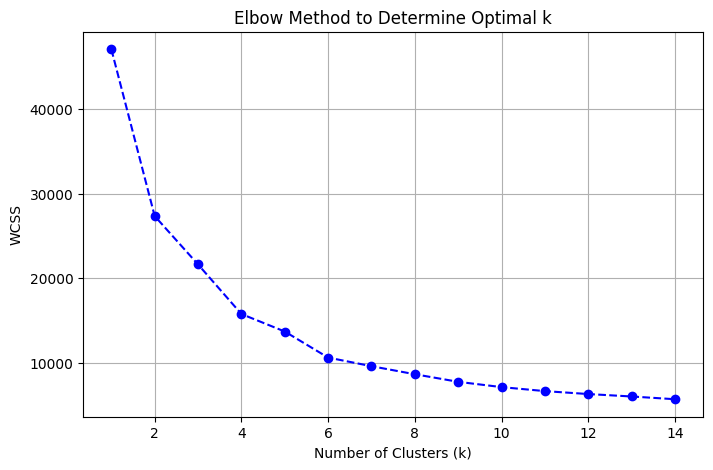

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # list to store within-cluster sum of squares
K_range = range(1, 15)# Test K values from 1 to 1=14

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()


##  Step 5.5: Interpreting the Elbow Method Output

###  Why is this important?
- The **Elbow Method** helps us determine the **optimal number of clusters (k)** by plotting the **Within-Cluster Sum of Squares (WCSS)** against different values of k.
- The point where the curve **bends like an elbow** indicates where adding more clusters does not significantly improve model performance.

### Our Observation:
- In our plot, the curve sharply decreases up to `k = 6` and then levels off.
- This suggests that **6 clusters** balance accuracy and complexity well.

### Conclusion:
We will use **k = 6** for our final K-Means clustering.


## Step 6: Applying K-Means Clustering with k=6

###  Why this step?
Based on the **Elbow Method**, we identified **k=6** as the optimal number of clusters, capturing more granular differences between customer/order groups. 
We apply the K-Means algorithm to: 
  - Assign each customer/order to a cluster.
  - Group similar patterns together (e.g., customers with similar spending or order characteristics).

###  What is happening here?
- Initialize **K-Means** with `n_clusters=6`.
- Fit the model on our standardized feature set.
- Predict and assign a **cluster label** for each record.


In [8]:
# Step 4: Apply KMeans with k=6
from sklearn.cluster import KMeans

# Initialize KMeans with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit the model and predict cluster labels
df['Cluster'] = kmeans.fit_predict(scaled_df)

# Display first few rows to confirm clustering
df[['payment_value', 'price', 'profit_margin', 'purchase_frequency', 'product_weight_g', 'Cluster']].head()


,payment_value,price,profit_margin,purchase_frequency,product_weight_g,Cluster
0,141.46,118.7,0.81,1.0,400.0,4
1,179.12,159.9,0.88,1.0,420.0,4
2,32.70,19.9,0.36,1.0,200.0,1
3,104.11,89.9,0.84,1.0,600.0,4
4,188.41,179.0,0.95,1.0,425.0,4


## Step 7: Cluster Profiling – Understanding Each Cluster

###  Why this step?
Once clusters are created, we need to interpret what they mean:
- Are some clusters high-value customers?
- Do some clusters represent low-profit, high-weight products?
- This helps translate raw clusters into actionable business insights.

###  What is happening here?
- We group the data by the new `Cluster` column.
- Calculate the mean (or other statistics) for the key features per cluster.
- This summary allows us to describe each cluster’s characteristics.


In [9]:
# Group by cluster and calculate mean of selected features
cluster_profile = df.groupby('Cluster')[['payment_value', 'price', 'profit_margin', 'purchase_frequency', 'product_weight_g']].mean()

# View cluster profiles
cluster_profile


,payment_value,price,profit_margin,purchase_frequency,product_weight_g
Cluster,,,,,
0,324.979438,232.145906,0.848761,1.0,3214.866972
1,64.601866,25.768801,0.312934,1.0,459.471264
2,318.012589,228.631203,0.912958,1.0,671.219935
3,73.295560,51.940598,0.710166,1.0,551.360211
4,167.978586,118.765051,0.840314,1.0,713.854674
5,148.856865,107.179196,0.677514,1.0,3022.782247


### 🟢 K-Means Clustering Results: Customer Segments

After applying **K-Means (k=6)** to the selected features (`payment_value`, `price`, `profit_margin`, `purchase_frequency`, `product_weight_g`), we obtained **6 distinct customer clusters**.  
The table below summarizes the characteristics and business implications of each cluster:

| **Cluster** | **Customer Type**              | **Key Characteristics**                                                                                      | **Business Implication**                                                      |
|-------------|---------------------------------|-------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------|
| 🟢 **0**    | **High Spenders, Profitable**   | Very high average payments (325), high product prices (232), strong profit margin (0.85), heavier items.   | Focus on **retention** with loyalty programs & premium services.             |
| 🔴 **1**    | **Low Value, Low Profit**       | Low payments (64), cheap products (26), very low profit margin (0.31), light items.                        | Apply **upselling** strategies or targeted promotions to boost spending.     |
| 🔵 **2**    | **High Spenders, Highest Profit**| High payments (318), high prices (229), **highest profit margin** (0.91), medium-weight products.          | These are **VIP customers**—reward with exclusive offers & benefits.         |
| 🟡 **3**    | **Low Spend, Decent Profit**    | Payments (73), prices (52), profit margin (0.71), medium-weight items.                                     | Encourage them to spend more; margins are already good.                      |
| 🟣 **4**    | **Moderate Spenders, Good Profit**| Payments (168), prices (119), profit margin (0.84), medium-weight items.                                   | Stable customers—**maintain engagement** & offer occasional deals.           |
| 🟤 **5**    | **Heavy Item Buyers, Lower Profit**| Payments (149), prices (107), profit margin (0.68), **very heavy products** (3000g+).                      | Shipping costs hurt profit—**optimize logistics** or adjust pricing.         |

---

✅ **Interpretation:**  
- Clusters **0 & 2** are **premium segments** → retention is key.  
- Cluster **1** needs **marketing interventions**.  
- Cluster **5** requires **cost optimization** due to high logistics expenses.  

---



## Step 8: Visualizing Customer Clusters
### Step 8.1: Cluster Size Distribution
After assigning customers to clusters using KMeans, it is important to understand how many customers fall into each cluster.  
This helps to:
- Assess whether clusters are balanced or dominated by one large group.
- Identify niche (small) clusters that may represent special customer segments.
We will plot a bar chart showing the count of records per cluster.



C:\Users\use\AppData\Local\Temp\ipykernel_4780\899250238.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')


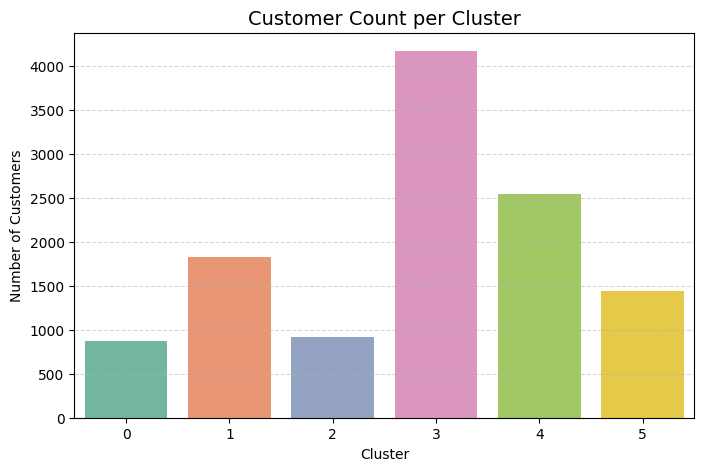

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of customers in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='Set2')

# Formatting
plt.title('Customer Count per Cluster', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


| **Cluster** | **Customer Count** | **Insights**                                                                           |
| ----------- | ------------------ | -------------------------------------------------------------------------------------- |
| **0**       | \~900              | Small segment, likely niche customers with unique patterns.                            |
| **1**       | \~1,800            | Medium segment; moderate spenders or mixed behavior.                                   |
| **2**       | \~950              | Small segment, similar in size to Cluster 0; may represent specific high or low value. |
| **3**       | \~4,100            | Largest segment; represents the most common customer profile.                          |
| **4**       | \~2,550            | Medium-to-large segment; important for targeted strategies.                            |
| **5**       | \~1,450            | Smaller segment; potential special group (e.g., high-cost items).                      |


### Step 8.1: Radar Chart for Cluster Profiles
- The radar chart allows us to compare clusters across multiple features simultaneously.  
- Each axis represents one of the key features (`payment_value`, `price`, `profit_margin`, `product_weight_g`),  
and the values are normalized to allow fair comparison.  
- This visualization highlights which clusters exhibit higher or lower values for each feature,  
helping to easily identify distinct customer profiles.


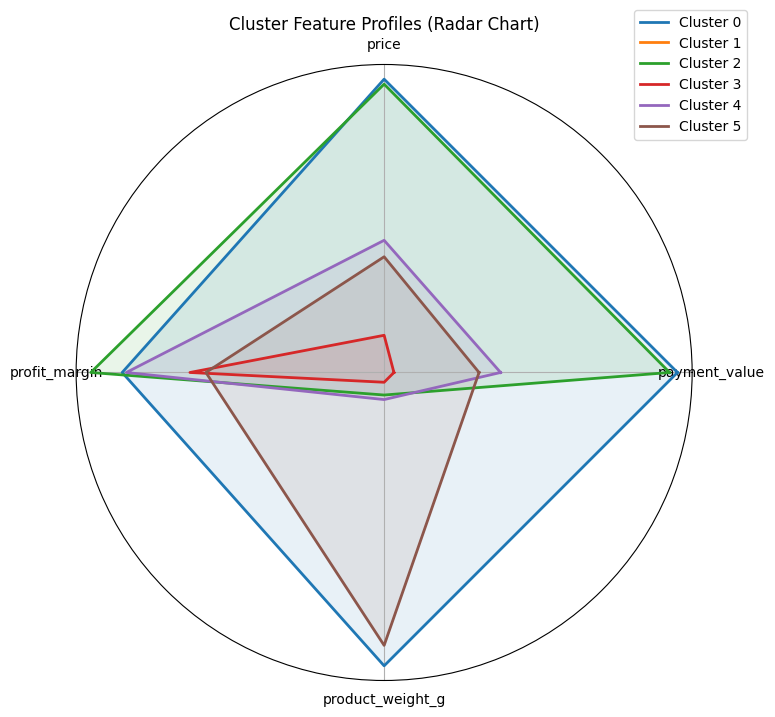

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare cluster profile data
cluster_profile = df.groupby('Cluster')[['payment_value', 'price', 'profit_margin', 'product_weight_g']].mean()

# Normalize the values for better comparison
cluster_normalized = (cluster_profile - cluster_profile.min()) / (cluster_profile.max() - cluster_profile.min())

# Radar chart settings
features = cluster_normalized.columns
N = len(features)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Plot radar chart for each cluster
plt.figure(figsize=(8, 8))
for i, row in cluster_normalized.iterrows():
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=f'Cluster {i}', linewidth=2)
    plt.fill(angles, values, alpha=0.1)

# Add feature labels and legend
plt.xticks(angles[:-1], features)
plt.yticks([])
plt.title("Cluster Feature Profiles (Radar Chart)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()


| **Cluster** | **Payment Value** | **Price** | **Profit Margin** | **Product Weight** | **Interpretation**                                                 |
| ----------- | ----------------- | --------- | ----------------- | ------------------ | ------------------------------------------------------------------ |
| **0**       | High              | High      | High              | Very High          | Premium customers buying expensive, heavy items with high margins. |
| **1**       | Moderate          | Moderate  | Medium            | Low                | Average spenders with balanced buying behavior.                    |
| **2**       | High              | Very High | High              | Low                | High-value purchases but products are lighter.                     |
| **3**       | Low               | Low       | Low               | Low                | Low spenders with minimal profitability.                           |
| **4**       | Moderate          | Moderate  | High              | Medium             | Stable buyers who yield good profit margins.                       |
| **5**       | Moderate          | Low       | Medium            | High               | Customers purchasing heavier products but at lower prices.         |


##  Customer Segments (Cluster Labeling)

After applying **K-Means clustering (k=6)**, we analyzed the mean values of key variables to understand the profile of each cluster.

| **Cluster** | **Segment Name**          | **Characteristics**                                                                 |
|-------------|----------------------------|-------------------------------------------------------------------------------------|
| **0**       |  **Premium High Spenders**   | Very high `payment_value` and `price`, strong `profit_margin`, heavy products.      |
| **1**       |  **Budget Buyers**          | Low `payment_value`, low `price`, lowest profit margins, small and light products.  |
| **2**       |  **High Profit Loyalists**   | High profit margins and prices but lighter products; consistent spending.           |
| **3**       |  **Low Value Occasional**    | Low across almost all metrics, represents occasional low-value purchases.           |
| **4**       |  **Moderate Spenders**       | Mid-range on price and profit margins; balanced product weights.                    |
| **5**       |  **Heavy Product Buyers**    | High product weight, moderate spending, and moderate profit margins.                |

**Why Label Clusters?**  
- Labels make results interpretable for stakeholders.  
- Helps in **personalizing marketing** or **targeting specific customer groups**.  

---



## Decision Tree Classifier for Late Delivery Prediction

We start with a **Decision Tree Classifier** to predict whether an order is delivered on time or late.  
A decision tree splits data based on feature thresholds, forming branches that lead to predictions ("On-Time" or "Late").  
This model is simple, interpretable, and helps us understand the key factors influencing late deliveries.  

**Why Decision Tree first?**
- It serves as a **baseline model**.
- It clearly shows how decisions are made at each step.
- It prepares us for **Random Forest**, which is an ensemble of multiple decision trees.

Next, we will implement Random Forest for improved performance.


## Step 1. Create the Target Variable LateDelivery
- We first need to create a column that indicates whether an order was delivered late or not.

- If the actual delivery date is later than the estimated delivery date, we mark it as 1 (Late).

- Otherwise, it’s 0 (On-time).

In [14]:
# Step 1: Create a new column 'LateDelivery' where:
# 1 = Delivered late
# 0 = Delivered on time
import pandas as pd
df['LateDelivery'] = (pd.to_datetime(df['order_delivered_customer_date']) >
                      pd.to_datetime(df['order_estimated_delivery_date'])).astype(int)

# Preview to confirm the new column
df[['order_delivered_customer_date', 'order_estimated_delivery_date', 'LateDelivery']].head()



,order_delivered_customer_date,order_estimated_delivery_date,LateDelivery
0,2018-08-07 15:27:45,2018-08-13,0
1,2018-08-17 18:06:29,2018-09-04,0
2,2018-07-30 15:52:25,2018-08-08,0
3,2018-08-13 18:24:27,2018-08-17,0
4,2018-07-31 22:48:50,2018-08-06,0


## Step 2. Select Features for Prediction
- We choose features that may influence delivery times, such as product weight, payment value, etc.

- These features will be our independent variables (X).

- LateDelivery will be the target variable (y).

In [15]:
#  Step 2: Select the relevant predictor features
features = ['payment_value', 'price', 'profit_margin', 'product_weight_g',
            'purchase_frequency', 'freight_value']

# Independent variables (X) and target variable (y)
X = df[features]
y = df['LateDelivery']

# Check dimensions to confirm selection
X.shape, y.shape


((11777, 6), (11777,))

- The dataset has 11,777 records.

- There are 6 predictor variables used to train the decision tree.

- The target variable is a single column (LateDelivery) that the model tries to predict.

## Step 3. Training and Visualizing the Decision Tree
-In this step, we will:

  - Train a Decision Tree Classifier on the training dataset to predict whether an order is delivered late.

  - Visualize the decision tree to understand the decision-making process.

  - Explain how the tree splits data based on features.



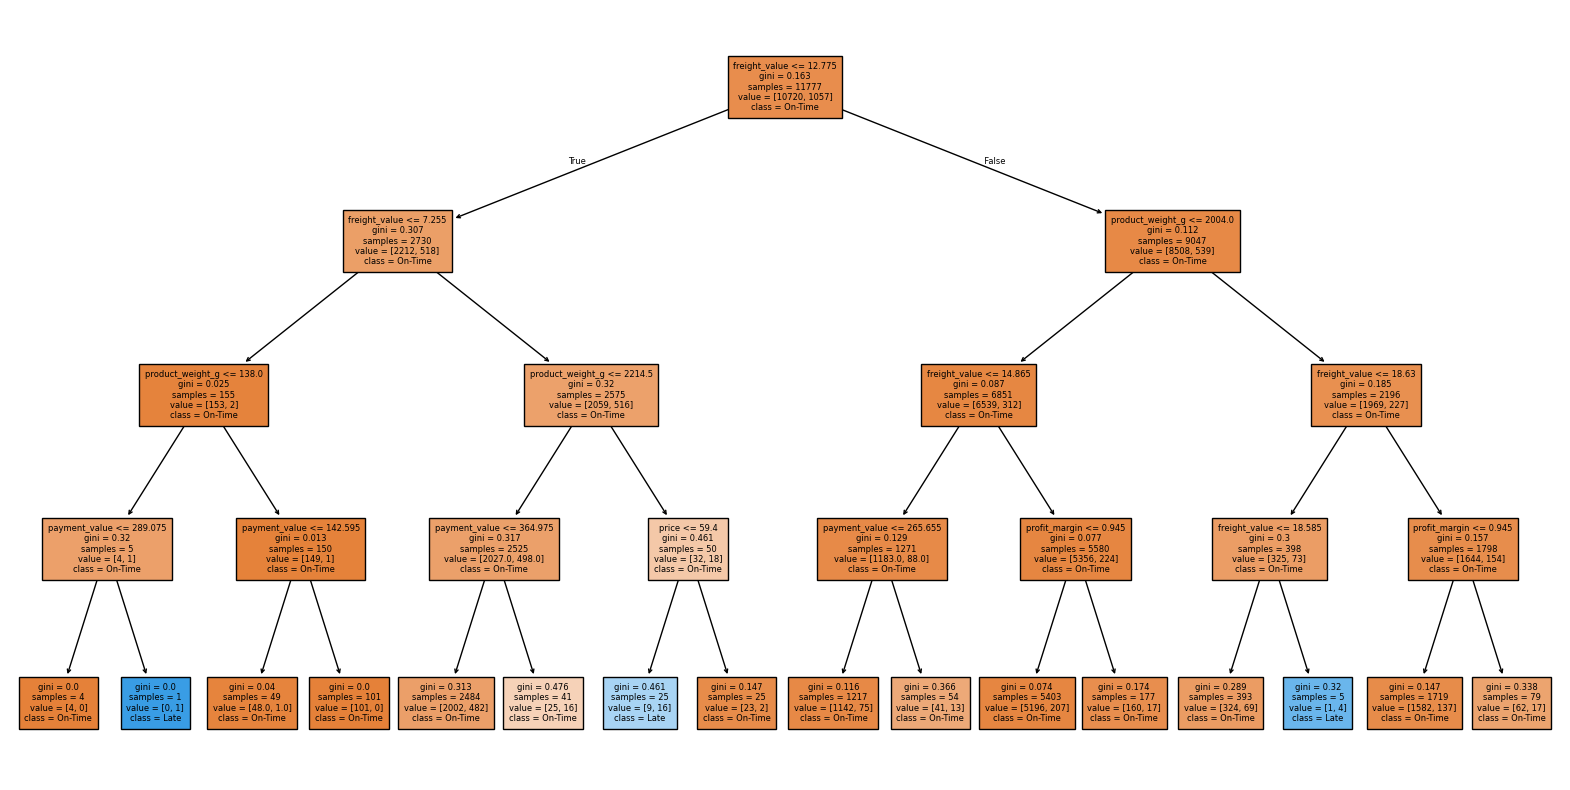

In [25]:
# Step 4: Train a Decision Tree Classifier and visualize it

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize the decision tree classifier
# Limits the tree to 4 levels to avoid overfitting while keeping interpretability.
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)  
# max_depth=4 keeps the tree simple and interpretable

# Train the model using the training data
dt_model.fit(X, y)

# Visualize the trained decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["On-Time", "Late"], filled=True,fontsize=6
          )
plt.show()


###  Understanding the Decision Tree Output (Simplified)

A **decision tree** is like a flowchart that helps predict an outcome (e.g., **On-Time** or **Late** delivery) by asking a series of **yes/no questions** about features in the data.

---

###  **1. Decision Nodes (Orange Boxes)**
- Contain a **condition** (e.g., `freight_value ≤ 12.775`).
- Show:
  - **Gini**: how mixed the classes are (lower = purer).
  - **Samples**: how many data points reach this node.
  - **Value**: distribution of classes (e.g., `[Late, On-Time]`).
  - **Class**: the class the model predicts at this point.

---

### **2. Leaf Nodes (Blue Boxes)**
- These are the **end points** of the tree.
- Show:
  - **Final Prediction** (e.g., "On-Time" or "Late").
  - **Number of samples** in that leaf.
  - **Probability** or confidence of the prediction.

---

### **How to Read the Tree**
1. Start at the **top node**.
2. Follow the branch based on whether the condition is **true or false**.
3. Continue until you reach a **blue leaf**.
4. The leaf tells you the **predicted class** and how confident the model is.

---

**Example in Simple Words:**
- If `freight_value` is **low**, deliveries are **mostly on time**.
- If it’s **high**, the model checks **product weight**.
- Heavy products might require more conditions to classify correctly.
- The process repeats until a clear prediction is made.


##  Step 4: Evaluating the Decision Tree Model

Now that we have trained our decision tree and understood its structure, the next step is to **evaluate how well it performs**.  
We do this by checking metrics such as:

- **Accuracy**: Percentage of correct predictions.
- **Precision**: How many predicted "Late" deliveries were actually late.
- **Recall**: How many actual late deliveries were correctly identified.
- **F1-Score**: Balance between precision and recall.
- **Confusion Matrix**: A table showing correct vs incorrect predictions.

This evaluation helps determine if our model is **reliable** or needs further tuning.


In [26]:
# Import required libraries
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

# 1. Define features (X) and target (y)
X = df[['freight_value', 'product_weight_g', 'profit_margin', 'price']]
y = df['LateDelivery']

# 2. Train Decision Tree Model
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

# 3. Make predictions
y_pred = clf.predict(X)

# 4. Generate confusion matrix
cm = confusion_matrix(y, y_pred)

# ✅ 5. Print classification metrics
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nAccuracy Score:", accuracy_score(y, y_pred))



Confusion Matrix:
 [[10710    10]
 [ 1036    21]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     10720
           1       0.68      0.02      0.04      1057

    accuracy                           0.91     11777
   macro avg       0.79      0.51      0.50     11777
weighted avg       0.89      0.91      0.87     11777


Accuracy Score: 0.9111828139594124


###  Interpretation of Decision Tree Model Evaluation

### 1. **Confusion Matrix**
[[10710 10]
[ 1036 21]]
- **True Positives (TP):** 21 – Correctly predicted late deliveries.
- **True Negatives (TN):** 10,710 – Correctly predicted on-time deliveries.
- **False Positives (FP):** 10 – Predicted late, but were actually on-time.
- **False Negatives (FN):** 1,036 – Predicted on-time, but were actually late.

---

### 2. **Classification Report**
| Metric      | Class 0 (On-Time) | Class 1 (Late) | Explanation |
|-------------|-------------------|----------------|-------------|
| **Precision** | 0.91 | 0.68 | For on-time, 91% of predicted on-time were correct; for late, only 68% were correct. |
| **Recall**    | 1.00 | 0.02 | Model detects almost all on-time deliveries, but only 2% of late deliveries. |
| **F1-Score**  | 0.95 | 0.04 | Harmonic mean of precision and recall; very low for late deliveries. |
| **Support**   | 10,720 | 1,057 | Number of actual instances per class. |

---

### 3. **Overall Accuracy**
- **Accuracy Score:** `0.91` (91%)  
- High accuracy because the majority of deliveries are on-time.
- Not a good indicator of performance for late deliveries (minority class).

---

### 4. **Key Insights**
- The model is **highly biased towards predicting "on-time"** deliveries.
- It **fails to capture most of the late deliveries** (low recall for class 1).
- Accuracy alone is **not a good metric** for this imbalanced dataset.

---

### 5. **Conclusion**
- The model is **good at predicting on-time deliveries** but **poor at identifying late deliveries**.  
- To improve predictions:
  - Use techniques like **SMOTE** (oversampling), **class weighting**, or **ensemble methods** to handle class imbalance.



##  Step 5: Visualizing the Confusion Matrix

While the numeric confusion matrix is informative, a **heatmap visualization** makes it easier to interpret.  
It shows how many predictions were correct vs. incorrect using color intensity.

- **True Positives (TP)**: Correctly predicted "Late" deliveries.
- **True Negatives (TN)**: Correctly predicted "On-Time" deliveries.
- **False Positives (FP)**: Predicted "Late" but was actually "On-Time".
- **False Negatives (FN)**: Predicted "On-Time" but was actually "Late".

This visualization quickly highlights whether the model is biased towards one class.


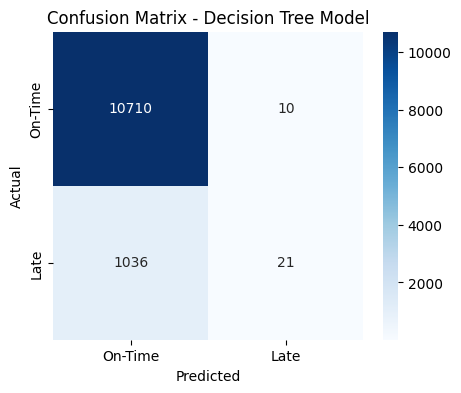

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 6.1: Get the confusion matrix
cm = confusion_matrix(y, y_pred)

# Step 6.2: Plot using seaborn heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On-Time','Late'], yticklabels=['On-Time','Late'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Model')
plt.show()


## Random Forest Classifier for Late Delivery Prediction

After using a single Decision Tree as our baseline model, we now implement a **Random Forest Classifier**.

###  What is Random Forest?
Random Forest is an **ensemble learning technique** that builds multiple decision trees and combines their predictions.  
It reduces overfitting and improves accuracy compared to a single tree.

###  Why use Random Forest?
- **Higher accuracy** due to averaging multiple trees.
- **Less overfitting**, providing better generalization on unseen data.
- **Feature importance** can be extracted, showing which factors influence predictions.

###  Steps:
1. Train a Random Forest model on the dataset.
2. Evaluate using accuracy, confusion matrix, and classification report.
3. Compare results with the Decision Tree classifier.
4. Analyze feature importance.


## Step 1. Training the Random Forest Classifier

Here, we create and train a **Random Forest Classifier** to predict late deliveries.  
- **Random Forest** builds multiple decision trees and takes the majority vote for the final prediction.  
- This helps to reduce overfitting and gives more stable predictions than a single decision tree.

We will use:
- `n_estimators=100`: number of trees in the forest.
- `random_state=42`: ensures reproducibility of results.


## Step 2. Split Data into Training and Testing Sets
🔹 Why we do this?
- To train the Random Forest on one part of the data (train set)

- To test its performance on unseen data (test set)

- This prevents overfitting and gives a realistic performance measure

In [32]:
# Step 2: Split the data into training and testing sets

from sklearn.model_selection import train_test_split

# Splitting the dataset: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of resulting datasets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((9421, 4), (2356, 4), (9421,), (2356,))

- This means:

    - Training data has 9421 samples.

   - Testing data has 2356 samples

## Step 3. Train the Random Forest Model
Now that we have our training and testing sets, we will train the Random Forest Classifier using the training data (X_train, y_train).




In [ ]:
# Step 2: Train the Random Forest Classifier with specified number of trees
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Step 3: Make Predictions Using the Random Forest Model
Now that we have trained our Random Forest classifier, we can use it to predict whether deliveries are On-Time (0) or Late (1) on the test data.

In [36]:
# Step 3: Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
# Preview first 10 predictions
y_pred_rf[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Step 5. Evaluate the Random Forest Model
We’ll now evaluate the model using confusion matrix, classification report, and accuracy score.

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

# Classification Report
cr_rf = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", cr_rf)

# Accuracy Score
acc_rf = accuracy_score(y_test, y_pred_rf)
print("\nAccuracy Score:", acc_rf)


Confusion Matrix:
 [[2113   53]
 [ 160   30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      2166
           1       0.36      0.16      0.22       190

    accuracy                           0.91      2356
   macro avg       0.65      0.57      0.59      2356
weighted avg       0.88      0.91      0.89      2356


Accuracy Score: 0.9095925297113752


## Random Forest Model Evaluation – Results Summary

### Confusion Matrix:
[[2113 53]
[ 160 30]]

- **TN (2113):** Correctly predicted on-time deliveries  
- **FP (53):** Incorrectly predicted late deliveries  
- **FN (160):** Missed late deliveries (predicted on-time instead)  
- **TP (30):** Correctly predicted late deliveries  

---

### Classification Report:

| Class        | Precision | Recall | F1-score |
|--------------|-----------|--------|----------|
| **On-Time** (0) | 0.93      | 0.98   | 0.95     |
| **Late** (1)    | 0.36      | 0.16   | 0.22     |

---

### Accuracy Score:
- **Overall Accuracy:** `91%`

---

### Interpretation:
- The model is **excellent at predicting on-time deliveries**.  
- It **struggles to detect late deliveries**, due to the imbalance in the dataset (fewer late cases).  
- Accuracy is high (91%) but mainly driven by the majority class (on-time).  

---



## Step 5. Analyzing Feature Importance
- In Random Forest, feature importance tells us which variables have the most influence in making predictions. 
- This helps identify which factors most strongly affect whether a delivery is late or on time

In [39]:
# Step 5: Analyzing Feature Importance
# --------------------------------------
# Extract the feature importances from the trained Random Forest model
import numpy as np

# Get feature names and their importance values
feature_importances = rf_model.feature_importances_
features = X.columns

# Combine features with their importance values
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display top features
importance_df


,Feature,Importance
0,freight_value,0.292778
3,price,0.292215
1,product_weight_g,0.256012
2,profit_margin,0.158995


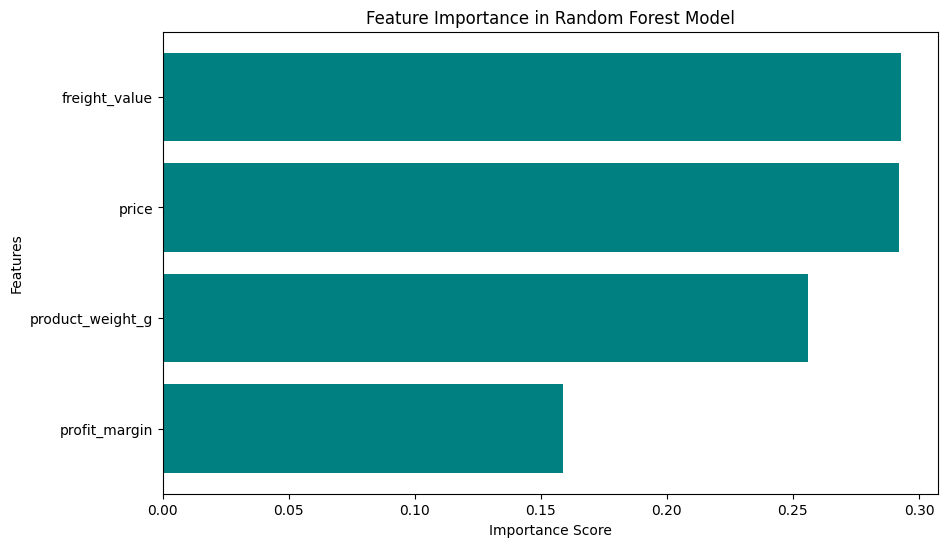

In [40]:
# Visualize feature importance using a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='teal')
plt.gca().invert_yaxis()  # Most important at the top
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Model')
plt.show()

##  Feature Importance – Random Forest

The table below shows how much each feature contributed to predicting whether a delivery is **On-Time** or **Late**.

| Feature             | Importance |
|----------------------|------------|
| **freight_value**    | 0.293      |
| **price**            | 0.292      |
| **product_weight_g** | 0.256      |
| **profit_margin**    | 0.159      |

---

###  Key Insights
- **freight_value (29.3%)** – Most influential feature for predicting delivery status.  
- **price (29.2%)** – Almost equally important as freight value, showing strong influence on predictions.  
- **product_weight_g (25.6%)** – Significant factor; heavier items may affect delivery timing.  
- **profit_margin (15.9%)** – Least important but still contributes to model decisions.

---

###  Why This Matters?
- This ranking helps identify **which factors most impact delivery delays**.  
- Businesses can use this information to **optimize costs, manage shipments, and improve on-time performance**.
---
### **Business Insights**
- **Late deliveries** are harder to predict (low recall), but cost-related features strongly influence outcomes.
- Companies should monitor **freight charges and product pricing** closely to reduce late shipments.
- Weight management and profit margin adjustments could also improve delivery performance.


